In [27]:
import numpy as np
import math
import scipy.stats as st
import matplotlib.pyplot as plt

## example of overfitting

we generate 12 data points from the function 

sin(2$\pi$x),    

where $x\in[0,1]$, while adding a Gaussian noise, $\epsilon\sim {\cal N}(0,0.3)$

In [28]:
N = 12 # number of points                                                                                                                                                                                   
def func(x):
    return math.sin(2*np.pi*x)

xmin = 0
xmax = 1.
np.random.seed(1231)
x = np.random.rand(N)
yclean = []
for i in range(N):
    yclean.append(func(x[i]) )

mu=0.
sigma=0.3
noise = st.norm.rvs(mu, sigma, size = N)
y = yclean + noise

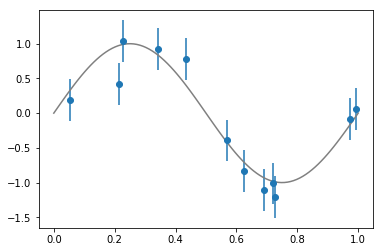

In [29]:
func_arr=[]
xs=np.linspace(0,1,100)
for xi in xs:
    func_arr.append(func(xi))

plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.plot(xs,func_arr,color='gray')
plt.show()

we use a polynomial model, where the prediction is: 

$f(x,{\vec w}) = {\vec w}^T \cdot \vec\phi(x) $,

where   $\vec\phi(x)=\{1,x,x^2,...,x^M\}^T$, with $M$ the order of the polynomial


In [30]:
def pred(x,w):
    '''
    x: vector of 1-D inputs
    w: vector of weights, dimension M+1 
    '''
    Mp1=len(w)
    output=[]
    for xi in x:
        phi=[]
        for h in range(1,Mp1):
            phi.append(xi**h)
        phi=np.hstack((1,phi))
        output.append(np.transpose(w).dot(phi))
    return output

In [31]:
x=np.array(x).reshape((len(x),1))

fitting a degree 3 polynomial

${\bf w}_{\rm MLE} = (\Phi \Phi^T)^{-1} \Phi^T {\bf y} $

w_MLE =  [[ -0.68709948]
 [ 15.43887105]
 [-41.77441509]
 [ 27.19404087]]


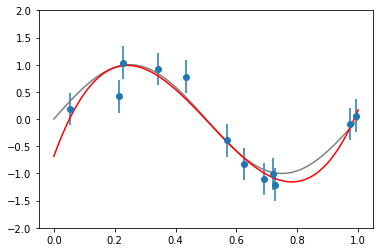

In [6]:
M=3 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))

w_MLE=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
print('w_MLE = ',w_MLE.reshape(-1,1))

pred_arr=pred(xs,w_MLE)

#plt.scatter(x,y)
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.plot(xs,func_arr,color='gray')
plt.plot(xs,pred_arr,color='red')
plt.ylim(-2,2)
plt.show()

fitting a degree 9 polynomial

w_MLE =  [[ 1.03526950e+02]
 [-3.65611683e+03]
 [ 4.41135016e+04]
 [-2.69097740e+05]
 [ 9.58421041e+05]
 [-2.11471839e+06]
 [ 2.92955585e+06]
 [-2.47907732e+06]
 [ 1.17044796e+06]
 [-2.36092685e+05]]


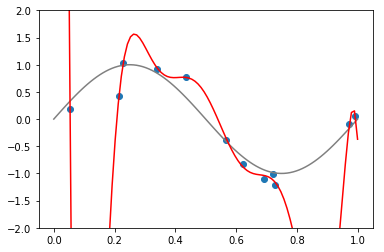

In [7]:
M=9 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))

w_MLE=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
print('w_MLE = ',w_MLE.reshape(-1,1))

pred_arr=pred(xs,w_MLE)

plt.scatter(x,y)
plt.plot(xs,func_arr,color='gray')
plt.plot(xs,pred_arr,color='red')
plt.ylim(-2,2)
plt.show()

checking training error as a function of the prder of the polynomial

In [32]:
for m in range(1,10):
    Phi=np.ones(N).reshape((-1,1))
    for h in range(1,m+1):
        Phi=np.hstack((Phi,x**h))
    w_MLE=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y)
    # computing error function
    err = np.sum((y-pred(x.flatten(),w_MLE))**2)
    print('M=',m,' error = ',err)

M= 1  error =  4.973068318951923
M= 2  error =  4.377259498511365
M= 3  error =  0.5811047188084892
M= 4  error =  0.3880503865565121
M= 5  error =  0.20643410003272367
M= 6  error =  0.19874928957410187
M= 7  error =  0.1953818094637149
M= 8  error =  0.16089214613097338
M= 9  error =  0.02439278277563196


## overfitting control

### training-test procedure

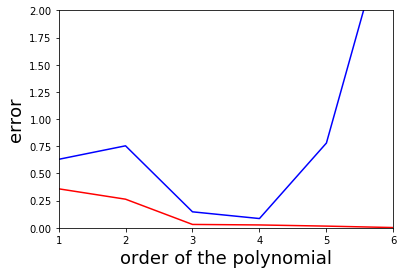

In [33]:
test_size = int(0.4*len(x))
x_test = x[:test_size]
x_train = x[test_size:]
y_test = y[:test_size]
y_train = y[test_size:]

arr_testerr=[]
arr_trainerr=[]
for m in range(1,10):
    Phi=np.ones(len(x_train)).reshape((-1,1))
    for h in range(1,m+1):
        Phi=np.hstack((Phi,x_train**h))
    w_MLE=np.linalg.inv(np.transpose(Phi).dot(Phi)).dot(np.transpose(Phi)).dot(y_train)
    # computing error function
    arr_trainerr.append(np.mean((y_train-pred(x_train.flatten(),w_MLE))**2))
    arr_testerr.append(np.mean((y_test-pred(x_test.flatten(),w_MLE))**2))
    #print('M=',m,' train error = ',arr_trainerr[-1],', test error = ',arr_testerr[-1])

maxis=np.linspace(1,9,9)
plt.plot(maxis,arr_testerr,color='blue')
plt.plot(maxis,arr_trainerr,color='red')
plt.ylim(0,2)
plt.xlim(1,6)
plt.xlabel('order of the polynomial',size=18)
plt.ylabel('error',size=18)
plt.show()

##  <font color='red'> implement K=5 cross validation for the above example </font>

### regularization procedure (Ridge regression)

In [83]:
M=9 # degree of the polynomial
Phi=np.ones(N).reshape((-1,1))
for h in range(1,M+1):
    Phi=np.hstack((Phi,x**h))

alpha=1.e-1
reg=alpha*np.identity(M+1)
reg[0,0]=0 
w_ridge=np.linalg.inv(np.transpose(Phi).dot(Phi)+reg).dot(np.transpose(Phi)).dot(y)

In [84]:
w_ridge

array([ 0.83412419, -0.77946895, -1.5641771 , -1.18437149, -0.55004137,
        0.02078313,  0.45976751,  0.77505492,  0.99243776,  1.1372781 ])

In [85]:
np.exp(-40)

4.248354255291589e-18

In [86]:
predridge_arr=pred(xs,w_ridge)

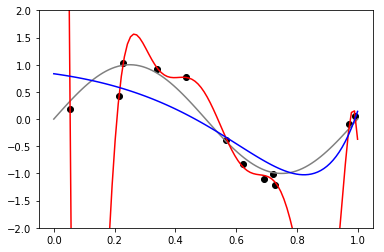

In [87]:
plt.scatter(x,y,color='black')
plt.plot(xs,func_arr,color='gray')
plt.plot(xs,pred_arr,color='red')
plt.plot(xs,predridge_arr,color='blue')
plt.ylim(-2,2)
plt.show()

### <font color='red'>play with the value of alpha. What happens if alpha tends to zero (e.g. 10^-15 or so)? What happens instead if alpha is too large (e.g. 0.1) ? Plot the correspoding fitting curves </font>